In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.9.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.9.2 on the current Colab Runtime...
2023-08-21 10:07:16 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.9/julia-1.9.2-linux-x86_64.tar.gz [146384758/146384758] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.9

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


In [ ]:
using Pkg

In [ ]:
Pkg.add(["CSV","LaTeXStrings","Interpolations","PyPlot","DataFrames","LinearAlgebra","SpecialFunctions","DifferentialEquations"]);

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Calculus ───────────────────────── v0.5.1
   Installed TreeViews ──────────────────────── v0.3.0
   Installed PDMats ─────────────────────────── v0.11.17
   Installed HypergeometricFunctions ────────── v0.3.23
   Installed StatsFuns ──────────────────────── v1.3.0
   Installed OffsetArrays ───────────────────── v1.12.10
   Installed NonlinearSolve ─────────────────── v1.9.0
   Installed DifferentialEquations ──────────── v7.9.0
   Installed InlineStrings ──────────────────── v1.4.0
   Installed Polyester ──────────────────────── v0.7.5
   Installed Sundials_jll ───────────────────── v5.2.1+0
   Installed EnumX ──────────────────────────── v1.0.4
   Installed StaticArrays ───────────────────── v1.6.2
   Installed RecursiveArrayTools ────────────── v2.38.7
   Installed InvertedIndices ────────────────── v1.3.0
   Installed FunctionWrappers ───────────────── v1.1.3
   Installed Triang

In [ ]:
using CSV
using DataFrames

In [ ]:
df=DataFrame(CSV.File("/content/SM_Thermo.csv"))

Row,t (s),T_gam (MeV),T_gam/T_nu,g*,gs,a,z_gam,z_nu,N
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.00738669,10.0,1.0,10.7361,10.7358,0.0511012,1.00002,1.00002,0.000406589
2,0.00752402,9.90832,1.0,10.7361,10.7358,0.0515741,1.00002,1.00002,0.00041399
3,0.00766391,9.81748,1.0,10.7361,10.7358,0.0520513,1.00003,1.00002,0.000421497
4,0.0078064,9.72747,1.0,10.7361,10.7357,0.052533,1.00003,1.00003,0.000429132
5,0.00795154,9.63829,1.0,10.7361,10.7357,0.0530191,1.00003,1.00003,0.000436923
6,0.00809938,9.54993,1.0,10.7361,10.7357,0.0535097,1.00003,1.00003,0.000444844
7,0.00824996,9.46237,1.0,10.736,10.7357,0.0540049,1.00003,1.00003,0.000452896
8,0.00840335,9.37562,1.0,10.736,10.7357,0.0545046,1.00003,1.00003,0.000461082
9,0.00855959,9.28966,1.0,10.736,10.7356,0.055009,1.00003,1.00003,0.000469412


In [ ]:
df[!,"z_gam"]

1001-element Vector{Float64}:
 1.000024
 1.0000245
 1.0000251
 1.0000257
 1.0000263
 1.0000269
 1.0000275
 1.0000282
 1.0000288
 1.0000295
 1.0000301
 1.0000308
 1.0000315
 ⋮
 1.3978836
 1.3978836
 1.3978836
 1.3978836
 1.3978836
 1.3978836
 1.3978836
 1.3978836
 1.3978836
 1.3978836
 1.3978836
 1.3978836

In [ ]:
z_gam=df[!,"z_gam"]
z_nu=df[!,"z_nu"]
gs=df[!,"gs"]
g=df[!,"g*"]

1001-element Vector{Float64}:
 10.736124
 10.736112
 10.736099
 10.736086
 10.736073
 10.73606
 10.736046
 10.736032
 10.736018
 10.736004
 10.735989
 10.735974
 10.735959
  ⋮
  3.3832064
  3.3832064
  3.3832064
  3.3832064
  3.3832064
  3.3832064
  3.3832064
  3.3832064
  3.3832064
  3.3832064
  3.3832064
  3.3832064

In [ ]:
z_g = (1.0 ./ z_gam) .* df[!,"a"]
m_e=0.511

0.511

In [ ]:
z_g

1001-element Vector{Float64}:
   0.051099997600057595
   0.051572823465825084
   0.052050020544484335
   0.05253163293703352
   0.053017701634447016
   0.05350826862757392
   0.05400337590716255
   0.05450305901373581
   0.05500737278766372
   0.0555163472677556
   0.05603003749587137
   0.056548476306929746
   0.05707171324103291
   ⋮
 461.7648922986149
 466.03755133832317
 470.34974156646524
 474.7018349739564
 479.09419639804065
 483.52720498330484
 488.0012255669929
 492.5166444473632
 497.07384792267396
 501.6732151375122
 506.31513954380756
 511.0000145934898

In [ ]:
cons = 4.8 / m_e^2

18.382282543341976

In [ ]:
function gprime_s(df)
    x = Float64[]  # Create an empty array to store the results
    for i in 1:1000  # Julia uses 1-based indexing instead of 0-based
        if z_g[i+1] != z_g[i]
            push!(x, (gs[i+1] - gs[i]) / (z_g[i+1] - z_g[i]))
        else
            push!(x, x[i])
        end
    end

    return x
end

gprime_list = gprime_s(df)
push!(gprime_list, 0.0)


1001-element Vector{Float64}:
 -0.038068983327555775
 -0.03772026444406718
 -0.03945081209273655
 -0.04114644721506389
 -0.03873069380164378
 -0.0403952856759856
 -0.04202663592989013
 -0.03965784999975411
 -0.043224171076960666
 -0.040880668638613525
 -0.04243509461875831
 -0.04395714159245324
 -0.043554168154443455
  ⋮
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0

In [ ]:
function my_function(cons, z_g, gprime_list, df)
    z_g_val = -(z_g^2) * (1/3) * gprime_list ./ df["gs"]
    return cons * (z_g_val + z_g) / sqrt(df["g*"])
end


my_function (generic function with 1 method)

In [ ]:
# Calculating 'func'
func = cons .* (-(z_g .^ 2) .* (1 ./ 3) .* (gprime_list ./ df[:, "gs"]) .+ z_g) ./ (sqrt.(df[:, "g*"]))

println(func)


[0.2866967619919819, 0.2893497154735869, 0.292028189988516, 0.2947314580625688, 0.2974577537767914, 0.3002112868992299, 0.30299032986034496, 0.30579301560983957, 0.30862477398610333, 0.31147958770680473, 0.3143629687778202, 0.3172730155610636, 0.3202089322153788, 0.323172029682415, 0.3261636517317593, 0.329181832749698, 0.3322290908960133, 0.3353034250412547, 0.3384073611970545, 0.34153887688996937, 0.3446993925859602, 0.3478914911201989, 0.3511096018567487, 0.35435990251382904, 0.3576402678927679, 0.3609510139372381, 0.36429119979359, 0.36766231205449357, 0.3710658386130017, 0.37450087998686343, 0.37796651094135475, 0.38146548407447756, 0.38499679739452214, 0.38855958282904113, 0.39215661910807836, 0.39578696815350517, 0.39944960569013876, 0.403147502599388, 0.4068796162995993, 0.41064633149881785, 0.4144465221497981, 0.41828328025063505, 0.42215555493325063, 0.4260637062425228, 0.43000660318401507, 0.4339874753540472, 0.4380066864766995, 0.44206013937006766, 0.44615263027333985, 0.45

In [ ]:
using Interpolations
# Interpolate using Interpolations package
dt_dz = LinearInterpolation(z_g, func, extrapolation_bc=Line())  # Linear interpolation

# Create new x values
x_new = range(0.051099997600057595, stop=511.0000145934898, length=100000)

# Evaluate the interpolation at x_new values
dtdz_new = dt_dz(x_new)


100000-element Vector{Float64}:
    0.2866967619919819
    0.3153705214378637
    0.344044925789345
    0.37272301416650166
    0.40140234518060536
    0.4300841155235796
    0.45877018989743323
    0.4874590161378902
    0.5161506934084213
    0.5448449683094644
    0.5735446754124089
    0.6022498312318962
    0.6309577771791786
    ⋮
 5106.323581788096
 5106.374646044739
 5106.425710301383
 5106.476774558027
 5106.527838814671
 5106.578903071315
 5106.629967327959
 5106.681031584602
 5106.7320958412465
 5106.78316009789
 5106.834224354534
 5106.885288611177

In [ ]:
using PyPlot


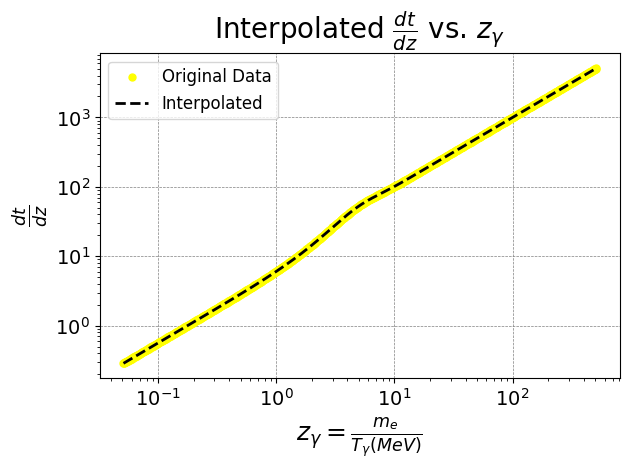

PyObject <matplotlib.legend.Legend object at 0x7e33d2bc8fa0>

In [ ]:
plot(z_g, func, "o", color="yellow", markersize=5, label="Original Data")
plot(x_new, dtdz_new, "--", color="black", linewidth=2, label="Interpolated")
xscale("log")
yscale("log")
xlabel(L"$z_{\gamma}=\frac{m_e}{T_\gamma(MeV)}}$", fontsize=18)
ylabel(L"$\frac{dt}{dz}$", fontsize=18)
title(L"Interpolated $\frac{dt}{dz}$ vs. $z_{\gamma}$", fontsize=20)
grid(true, linestyle="--", linewidth=0.5, color="gray")
tick_params(axis="both", which="major", labelsize=14)
tight_layout()
legend(fontsize=12)

In [ ]:
a_0 = 1
a_1 = 0.15735
a_2 = 4.6172
a_3 = -0.40520e2
a_4 = 0.13875e3
a_5 = -0.59898e2
a_6 = 0.66752e2
a_7 = -0.16705e2
a_8 = 3.8071
a_9 = -0.39140
a_10 = 0.023590
a_11 = -0.83696e-4
a_12 = -0.42095e-4
a_13 = 0.17675e-5
q_np = 0.33979

b_0 = -0.62173
b_1 = 0.22211e2
b_2 = -0.72798e2
b_3 = 0.11571e3
b_4 = -0.11763e2
b_5 = 0.45521e2
b_6 = -3.7973
b_7 = 0.41266
b_8 = -0.026210
b_9 = 0.87934e-3
b_10 = -0.12016e-4
q_pn = 2.8602
tau = 8.7945e2
m_e = 0.511

a_values = [a_1, a_2, a_3, a_4, a_5, a_6, a_7, a_8, a_9, a_10, a_11, a_12, a_13]
b_values = [b_1, b_2, b_3, b_4, b_5, b_6, b_7, b_8, b_9, b_10]


10-element Vector{Float64}:
  22.211
 -72.798
 115.71
 -11.763
  45.521
  -3.7973
   0.41266
  -0.02621
   0.00087934
  -1.2016e-5

In [ ]:
using Base

z_int = sort(z_g)


1001-element Vector{Float64}:
   0.051099997600057595
   0.051572823465825084
   0.052050020544484335
   0.05253163293703352
   0.053017701634447016
   0.05350826862757392
   0.05400337590716255
   0.05450305901373581
   0.05500737278766372
   0.0555163472677556
   0.05603003749587137
   0.056548476306929746
   0.05707171324103291
   ⋮
 461.7648922986149
 466.03755133832317
 470.34974156646524
 474.7018349739564
 479.09419639804065
 483.52720498330484
 488.0012255669929
 492.5166444473632
 497.07384792267396
 501.6732151375122
 506.31513954380756
 511.0000145934898

In [ ]:
znu = []
for x in z_int
    if (1 / x) * m_e >= 0.01
        push!(znu, x)
    end
end


In [ ]:


# Define the weak rate function for n <--> p
function lambda_np(z)
    f1 = 1.0
    for ie in 1:13
        f1 += a_values[ie] / z^ie
    end
    f1 *= exp(-0.33979 / z) / tau
    return f1
end

# Define the weak rate function for p <--> n
function lambda_pn(z)
    r1 = -0.62173
    e = m_e / z

    if (e >= 0.1)
        for ie in 1:10
            r1 += b_values[ie] / z^ie
        end
        r1 *= exp(-2.8602 * z) / tau
        weak_rate = r1
    else
        weak_rate = 0
    end
    return weak_rate
end


lambda_pn (generic function with 1 method)

In [ ]:
function f1(z, xn, xp)
    value = (lambda_pn(z) * xp - lambda_np(z) * xn) * dt_dz(z)
    return value
end

function f2(z, xn, xp)
    value = (lambda_np(z) * xn - lambda_pn(z) * xp) * dt_dz(z)
    return value
end

f2 (generic function with 1 method)

In [ ]:
Pkg.add("DifferentialEquations")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [ ]:
using DifferentialEquations

In [ ]:
function ode_solvez(u, p, z)
    xn, xp = u
    dx_n = f1(z,u[1],u[2])  # Define the equation for dx/dt here based on x, y, and t
    dx_p = f2(z,u[1],u[2])
    [dx_n,dx_p] # Define the equation for dy/dt here based on x, y, and t
end


ode_solvez (generic function with 1 method)

In [ ]:
using DifferentialEquations, BenchmarkTools
u0 = [0.46771996026; 0.53228003974]
tspan = (minimum(znu),maximum(znu))
prob = ODEProblem(ode_solvez, u0, tspan)
@btime solve(prob, Rodas5());


  2.769 ms (120002 allocations: 2.57 MiB)


In [ ]:
sol = solve(prob,Rodas5())  # You can choose a different solver if needed

retcode: Success
Interpolation: specialized 4rd order "free" stiffness-aware interpolation
t: 45-element Vector{Float64}:
  0.051099997600057595
  0.05215406287277413
  0.05260876873006082
  0.05317420411347507
  0.053972560644458475
  0.05524282518135376
  0.05744893461909246
  0.061319822780496434
  0.06771670786008648
  0.07411359293967651
  0.08529937358713495
  0.10090932111448495
  0.11911023696395359
  ⋮
  7.943265377227245
 10.366693345344455
 13.617583261034103
 17.5046122854704
 20.68464746379411
 24.4438048017254
 28.20296213965669
 32.02678821427247
 36.01536311032041
 40.411521988858254
 45.49926136695878
 50.63151395438075
u: 45-element Vector{Vector{Float64}}:
 [0.46771996026, 0.53228003974]
 [0.4637934000673946, 0.5362065999326054]
 [0.46389376746333244, 0.5361062325366676]
 [0.46352069329804946, 0.5364793067019507]
 [0.46306206823904505, 0.536937931760955]
 [0.4623424233479891, 0.537657576652011]
 [0.46111996540371664, 0.5388800345962836]
 [0.4589747741020745, 0.541025

In [ ]:
z_values = sol.t
xn_values = sol[1, :]
xp_values = sol[2, :]

45-element Vector{Float64}:
 0.53228003974
 0.5362065999326054
 0.5361062325366676
 0.5364793067019507
 0.536937931760955
 0.537657576652011
 0.5388800345962836
 0.5410252258979259
 0.5446943819874391
 0.5484744204034677
 0.5551075727691601
 0.5643554374320192
 0.5752518353607191
 ⋮
 0.8852874865288939
 0.9113203164527904
 0.943137482462801
 0.9713833883670471
 0.9856291902271571
 0.994508072612281
 0.9982117422288632
 0.9995154310368547
 0.9998960013535261
 0.9999845427008148
 0.9999987151826583
 0.9999999231480633

In [ ]:
length(xn_values)

45

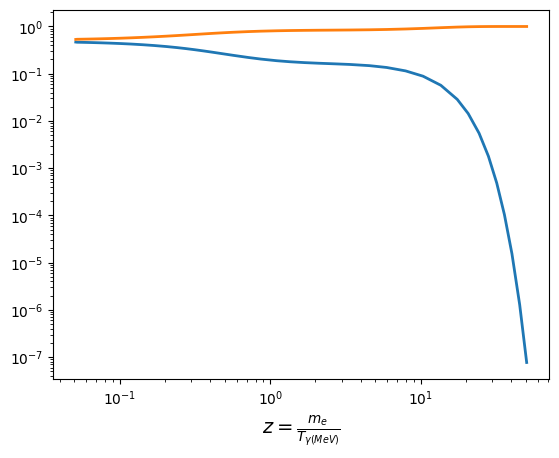

PyObject Text(0.5, 44.836388888888884, '$z=\\frac{m_e}{T_{\\gamma(MeV)}}$')

In [ ]:
plot(z_values, xn_values, linewidth=2, label=L"$p$")
plot(z_values, xp_values, linewidth=2, label=L"$n$")
yscale("log")
xscale("log")
xlabel(L"$z=\frac{m_e}{T_{\gamma(MeV)}}$", fontsize=14)

In [ ]:
function mev_to_t9kelvin(mev)
    temp9_kelvin = mev * 11604525006.1598 / 10^9
    return temp9_kelvin
end


mev_to_t9kelvin (generic function with 1 method)

In [ ]:
const NA=6.022e23

6.022e23

In [ ]:
function n_b(z)
    T_mev = m_e / z
    T_kelvin = T_mev * 11604525006.1598
    n_bz = 6.14e-10 * 410.73 * (T_kelvin / 2.7255)^3
    return n_bz
end

n_b (generic function with 1 method)

In [ ]:
function pn_gammaD(z)
    T = m_e / z
    T_9 = mev_to_t9kelvin(T)
    if T_9 <= 1.5
        f = (44216. * (1 + 3.75191 * T_9 + 1.92934 * T_9^2 + 0.746503 * T_9^3 + 0.0197023 * T_9^4 + 3.00491e-6 * T_9^5) /
             (1 + 5.4678 * T_9 + 5.62395 * T_9^2 + 0.489312 * T_9^3 + 0.00747806 * T_9^4))
    else
        f = (1.0 - sqrt(T_9) * 0.8504 + T_9 * 0.4895 - T_9^(3/2) * 0.09623 + T_9 * 0.008471 * T_9 - T_9 * 2.8e-4 * T_9^(3/2)) * 47420.0
    end
    rate = f
    return (n_b(z)*f / NA)
end


function Dp_gamma3He(z)
    T = m_e / z
    T9 = mev_to_t9kelvin(T)
    if T9 < 0.001
        rate = 4.815e-14
    elseif 0.001 <= T9 <= 0.0015
        rate = 4.815e-14
    elseif 0.0015 < T9 <= 0.0025
        rate = 6.409e-9
    elseif 0.0025 < T9 <= 0.0035
        rate = 4.525e-7
    elseif 0.0035 < T9 <= 0.0045
        rate = 4.896e-6
    elseif 0.0045 < T9 <= 0.0055
        rate = 2.444e-5
    elseif 0.0055 < T9 <= 0.0065
        rate = 8.086e-5
    elseif 0.0065 < T9 <= 0.0075
        rate = 2.078e-4
    elseif 0.0075 < T9 <= 0.0085
        rate = 4.499e-4
    elseif 0.0085 < T9 <= 0.0095
        rate = 8.619e-4
    elseif 0.0095 < T9 <= 0.0105
        rate = 1.506e-3
    elseif 0.0105 < T9 <= 0.0115
        rate = 2.450e-3
    elseif 0.0115 < T9 <= 0.0125
        rate = 3.767e-3
    elseif 0.0125 < T9 <= 0.0135
        rate = 5.531e-3
    elseif 0.0135 < T9 <= 0.0145
        rate = 7.816e-3
    elseif 0.0145 < T9 <= 0.0155
        rate = 1.070e-2
    elseif 0.0155 < T9 <= 0.0170
        rate = 1.425e-2
    elseif 0.0170 < T9 <= 0.0190
        rate = 2.366e-2
    elseif 0.0190 < T9 <= 0.0225
        rate = 3.659e-2
    elseif 0.0225 < T9 <= 0.0275
        rate = 8.753e-2
    elseif 0.0275 < T9 <= 0.0350
        rate = 1.701e-1
    elseif 0.0350 < T9 <= 0.0450
        rate = 4.476e-1
    elseif 0.0450 < T9 <= 0.0550
        rate = 8.915e-1
    elseif 0.0550 < T9 <= 0.0650
        rate = 1.510
    elseif 0.0650 < T9 <= 0.0750
        rate = 2.302
    elseif 0.0750 < T9 <= 0.0850
        rate = 3.265
    elseif 0.0850 < T9 <= 0.0950
        rate = 4.392
    elseif 0.0950 < T9 <= 0.1050
        rate = 5.676
    elseif 0.1050 < T9 <= 0.1150
        rate = 7.109
    elseif 0.1150 < T9 <= 0.1250
        rate = 8.685
    elseif 0.1250 < T9 <= 0.1350
        rate = 1.040e1
    elseif 0.1350 < T9 <= 0.1450
        rate = 1.224e1
    elseif 0.1450 < T9 <= 0.1550
        rate = 1.420e1
    elseif 0.1550 < T9 <= 0.1700
        rate = 1.628e1
    elseif 0.1700 < T9 <= 0.1900
        rate = 2.076e1
    elseif 0.1900 < T9 <= 0.2250
        rate = 2.565e1
    elseif 0.2250 < T9 <= 0.2750
        rate = 3.941e1
    elseif 0.2750 < T9 <= 0.3250
        rate = 5.505e1
    elseif 0.3250 < T9 <= 0.3750
        rate = 7.225e1
    elseif 0.3750 < T9 <= 0.4250
        rate = 9.076e1
    elseif 0.4250 < T9 <= 0.4750
        rate = 1.104e2
    elseif 0.4750 < T9 <= 0.5500
        rate = 1.310e2
    elseif 0.5500 < T9 <= 0.6500
        rate = 1.748e2
    elseif 0.6500 < T9 <= 0.7500
        rate = 2.212e2
    elseif 0.7500 < T9 <= 0.8500
        rate = 2.700e2
    elseif 0.8500 < T9 <= 0.9500
        rate = 3.207e2
    elseif 0.9500 < T9 <= 1.1250
        rate = 3.729e2
    elseif 1.1250 < T9 <= 1.3750
        rate = 5.093e2
    elseif 1.3750 < T9 <= 1.6250
        rate = 6.522e2
    elseif 1.6250 < T9 <= 1.8750
        rate = 8.000e2
    elseif 1.8750 < T9 <= 2.2500
        rate = 9.517e2
    elseif 2.2500 < T9 <= 2.7500
        rate = 1.265e3
    elseif 2.7500 < T9 <= 3.2500
        rate = 1.587e3
    elseif 3.2500 < T9 <= 3.7500
        rate = 1.914e3
    elseif 3.7500 < T9 <= 4.5000
        rate = 2.244e3
    elseif 4.5000 < T9 <= 5.5000
        rate = 2.905e3
    elseif 5.5000 < T9 <= 6.5000
        rate = 3.557e3
    elseif 6.5000 < T9 <= 7.5000
        rate = 4.194e3
    elseif 7.5000 < T9 <= 8.5000
        rate = 4.812e3
    elseif 8.5000 < T9 <= 9.5000
        rate = 5.410e3
    elseif 9.5000 < T9 <= 10.0000
        rate = 5.988e3
    else
        rate = 0.0
    end
    return (n_b(z)*rate / NA)
end



function DD_n3He(z)
    T9 = mev_to_t9kelvin(m_e / z)
    if T9 < 0.001
        rate = 1.142e-8
    elseif 0.001 <= T9 <= 0.0015
        rate = 1.142e-8
    elseif 0.0015 < T9 <= 0.0025
        rate = 5.470e-5
    elseif 0.0025 < T9 <= 0.0035
        rate = 3.021e-3
    elseif 0.0035 < T9 <= 0.0045
        rate = 3.732e-2
    elseif 0.0045 < T9 <= 0.0055
        rate = 2.212e-1
    elseif 0.0055 < T9 <= 0.0065
        rate = 8.546e-1
    elseif 0.0065 < T9 <= 0.0075
        rate = 2.505
    elseif 0.0075 < T9 <= 0.0085
        rate = 6.066
    elseif 0.0085 < T9 <= 0.0095
        rate = 1.278e1
    elseif 0.0095 < T9 <= 0.0105
        rate = 2.424e1
    elseif 0.0105 < T9 <= 0.0115
        rate = 4.237e1
    elseif 0.0115 < T9 <= 0.0125
        rate = 6.936e1
    elseif 0.0125 < T9 <= 0.0135
        rate = 1.077e2
    elseif 0.0135 < T9 <= 0.0145
        rate = 1.600e2
    elseif 0.0145 < T9 <= 0.0155
        rate = 2.291e2
    elseif 0.0155 < T9 <= 0.0170
        rate = 3.179e2
    elseif 0.0170 < T9 <= 0.0190
        rate = 5.667e2
    elseif 0.0190 < T9 <= 0.0225
        rate = 9.310e2
    elseif 0.0225 < T9 <= 0.0275
        rate = 2.504e3
    elseif 0.0275 < T9 <= 0.0350
        rate = 5.301e3
    elseif 0.0350 < T9 <= 0.0450
        rate = 1.568e4
    elseif 0.0450 < T9 <= 0.0550
        rate = 3.369e4
    elseif 0.0550 < T9 <= 0.0650
        rate = 6.013e4
    elseif 0.0650 < T9 <= 0.0750
        rate = 9.527e4
    elseif 0.0750 < T9 <= 0.0850
        rate = 1.390e5
    elseif 0.0850 < T9 <= 0.0950
        rate = 1.912e5
    elseif 0.0950 < T9 <= 0.1050
        rate = 2.513e5
    elseif 0.1050 < T9 <= 0.1150
        rate = 3.190e5
    elseif 0.1150 < T9 <= 0.1250
        rate = 3.938e5
    elseif 0.1250 < T9 <= 0.1350
        rate = 4.753e5
    elseif 0.1350 < T9 <= 0.1450
        rate = 5.631e5
    elseif 0.1450 < T9 <= 0.1550
        rate = 6.568e5
    elseif 0.1550 < T9 <= 0.1700
        rate = 7.559e5
    elseif 0.1700 < T9 <= 0.1900
        rate = 9.691e5
    elseif 0.1900 < T9 <= 0.2250
        rate = 1.200e6
    elseif 0.2250 < T9 <= 0.2750
        rate = 1.842e6
    elseif 0.2750 < T9 <= 0.3250
        rate = 2.555e6
    elseif 0.3250 < T9 <= 0.3750
        rate = 3.318e6
    elseif 0.3750 < T9 <= 0.4250
        rate = 4.119e6
    elseif 0.4250 < T9 <= 0.4750
        rate = 4.946e6
    elseif 0.4750 < T9 <= 0.5500
        rate = 5.792e6
    elseif 0.5500 < T9 <= 0.6500
        rate = 7.517e6
    elseif 0.6500 < T9 <= 0.7500
        rate = 9.260e6
    elseif 0.7500 < T9 <= 0.8500
        rate = 1.100e7
    elseif 0.8500 < T9 <= 0.9500
        rate = 1.272e7
    elseif 0.9500 < T9 <= 1.1250
        rate = 1.442e7
    elseif 1.1250 < T9 <= 1.3750
        rate = 1.850e7
    elseif 1.3750 < T9 <= 1.6250
        rate = 2.235e7
    elseif 1.6250 < T9 <= 1.8750
        rate = 2.595e7
    elseif 1.8750 < T9 <= 2.2500
        rate = 2.932e7
    elseif 2.2500 < T9 <= 2.7500
        rate = 3.546e7
    elseif 2.7500 < T9 <= 3.2500
        rate = 4.093e7
    elseif 3.2500 < T9 <= 3.7500
        rate = 4.585e7
    elseif 3.7500 < T9 <= 4.5000
        rate = 5.031e7
    elseif 4.5000 < T9 <= 5.5000
        rate = 5.816e7
    elseif 5.5000 < T9 <= 6.5000
        rate = 6.488e7
    elseif 6.5000 < T9 <= 7.5000
        rate = 7.072e7
    elseif 7.5000 < T9 <= 8.5000
        rate = 7.583e7
    elseif 8.5000 < T9 <= 9.5000
        rate = 8.037e7
    elseif 9.5000 < T9 <= 10.0000
        rate = 8.437e7
    else
        rate = 0.0
    end
    return (n_b(z)*rate / NA)
end



function DD_p3H(z)
    T = m_e / z
    T9 = mev_to_t9kelvin(T)

    if T9 < 0.001
        rate = 1.173e-8
    elseif 0.001 <= T9 <= 0.0015
        rate = 1.173e-8
    elseif 0.0015 < T9 <= 0.0025
        rate = 5.609e-5
    elseif 0.0025 < T9 <= 0.0035
        rate = 3.092e-3
    elseif 0.0035 < T9 <= 0.0045
        rate = 3.814e-2
    elseif 0.0045 < T9 <= 0.0055
        rate = 2.257e-1
    elseif 0.0055 < T9 <= 0.0065
        rate = 8.707e-1
    elseif 0.0065 < T9 <= 0.0075
        rate = 2.549
    elseif 0.0075 < T9 <= 0.0085
        rate = 6.164
    elseif 0.0085 < T9 <= 0.0095
        rate = 1.297e1
    elseif 0.0095 < T9 <= 0.0105
        rate = 2.458e1
    elseif 0.0105 < T9 <= 0.0115
        rate = 4.290e1
    elseif 0.0115 < T9 <= 0.0125
        rate = 7.016e1
    elseif 0.0125 < T9 <= 0.0135
        rate = 1.088e2
    elseif 0.0135 < T9 <= 0.0145
        rate = 1.615e2
    elseif 0.0145 < T9 <= 0.0155
        rate = 2.310e2
    elseif 0.0155 < T9 <= 0.0170
        rate = 3.202e2
    elseif 0.0170 < T9 <= 0.0190
        rate = 5.698e2
    elseif 0.0190 < T9 <= 0.0225
        rate = 9.343e2
    elseif 0.0225 < T9 <= 0.0275
        rate = 2.502e3
    elseif 0.0275 < T9 <= 0.0350
        rate = 5.276e3
    elseif 0.0350 < T9 <= 0.0450
        rate = 1.549e4
    elseif 0.0450 < T9 <= 0.0550
        rate = 3.307e4
    elseif 0.0550 < T9 <= 0.0650
        rate = 5.868e4
    elseif 0.0650 < T9 <= 0.0750
        rate = 9.246e4
    elseif 0.0750 < T9 <= 0.0850
        rate = 1.343e5
    elseif 0.0850 < T9 <= 0.0950
        rate = 1.837e5
    elseif 0.0950 < T9 <= 0.1050
        rate = 2.404e5
    elseif 0.1050 < T9 <= 0.1150
        rate = 3.039e5
    elseif 0.1150 < T9 <= 0.1250
        rate = 3.737e5
    elseif 0.1250 < T9 <= 0.1350
        rate = 4.493e5
    elseif 0.1350 < T9 <= 0.1450
        rate = 5.304e5
    elseif 0.1450 < T9 <= 0.1550
        rate = 6.165e5
    elseif 0.1550 < T9 <= 0.1700
        rate = 7.072e5
    elseif 0.1700 < T9 <= 0.1900
        rate = 9.011e5
    elseif 0.1900 < T9 <= 0.2250
        rate = 1.110e6
    elseif 0.2250 < T9 <= 0.2750
        rate = 1.682e6
    elseif 0.2750 < T9 <= 0.3250
        rate = 2.309e6
    elseif 0.3250 < T9 <= 0.3750
        rate = 2.974e6
    elseif 0.3750 < T9 <= 0.4250
        rate = 3.663e6
    elseif 0.4250 < T9 <= 0.4750
        rate = 4.371e6
    elseif 0.4750 < T9 <= 0.5500
        rate = 5.089e6
    elseif 0.5500 < T9 <= 0.6500
        rate = 6.543e6
    elseif 0.6500 < T9 <= 0.7500
        rate = 8.001e6
    elseif 0.7500 < T9 <= 0.8500
        rate = 9.448e6
    elseif 0.8500 < T9 <= 0.9500
        rate = 1.087e7
    elseif 0.9500 < T9 <= 1.1250
        rate = 1.228e7
    elseif 1.1250 < T9 <= 1.3750
        rate = 1.565e7
    elseif 1.3750 < T9 <= 1.6250
        rate = 2.882e7
    elseif 1.6250 < T9 <= 1.8750
        rate = 2.181e7
    elseif 1.8750 < T9 <= 2.2500
        rate = 2.461e7
    elseif 2.2500 < T9 <= 2.7500
        rate = 2.976e7
    elseif 2.7500 < T9 <= 3.2500
        rate = 3.440e7
    elseif 3.2500 < T9 <= 3.7500
        rate = 3.863e7
    elseif 3.7500 < T9 <= 4.5000
        rate = 4.251e7
    elseif 4.5000 < T9 <= 5.5000
        rate = 4.946e7
    elseif 5.5000 < T9 <= 6.5000
        rate = 5.552e7
    elseif 6.5000 < T9 <= 7.5000
        rate = 6.077e7
    elseif 7.5000 < T9 <= 8.5000
        rate = 6.529e7
    elseif 8.5000 < T9 <= 9.5000
        rate = 6.912e7
    elseif 9.5000 < T9 <= 10.0000
        rate = 7.228e7
    else
        rate = 0.0
    end

    rate =rate/NA
    return (n_b(z)*rate)
end

function n3He_p3h(z)
    T = m_e / z
    T9 = mev_to_t9kelvin(T)

    if T9 < 2.5
        rate = (7.064935e8 + 6.733213571736319e8 * T9 + 1.7181155480346258e9 * T9 * T9 -
                4.5367658146835446e8 * T9 * T9 * T9 - 1.2216728981712557e8 * T9^4 -
                4.92736677238425e8 * sqrt(T9) - 1.3659670893994067e9 * T9^(3/2) -
                6.629932739639357e8 * T9^(5/2) + 4.834951929033479e8 * T9^(7/2))
    else
        rate = 4.81732e8
    end

    return (n_b(z)*rate / NA)
end

function D3H_4Hen(z)
    T = m_e / z
    T9 = mev_to_t9kelvin(T)

    if T9 < 2.5
        factor1 = 6.2265733e8 / (exp(0.49711597 / T9) * T9^0.56785403)
        factor2 = exp(-0.23309803 * T9^2 - 1.342742 * T9^(-1/3))
        factor3 = (-8.1144927e7 + 2.2315324e9 * T9 - 2.9439669e9 * T9^2
                   + 1.8764462e9 * T9^3 - 6.0511612e8 * T9^4
                   + 9.5196576e7 * T9^5
                   - 5.2901086e6 * T9^6) * T9^(-2/3)
        rate = factor1 + factor2 * factor3
    else
        rate = 3.40249e8
    end

    return (n_b(z)*rate / NA)
end

function D3He_p4He(z)
    T = m_e / z
    T9 = mev_to_t9kelvin(T)

    if T9 < 2.5
        factor1 = 3.1038385e8 / (exp(1.6190981 / T9) * T9^0.12159455)
        factor2 = exp(-0.0062340825 * T9^2 - 1.4540617 * T9^(-1/3))
        factor3 = (-3.1335916e7 - 6.2051071e8 * T9 - 1.8782248e9 * T9^2
                   + 6.5642773e8 * T9^3 + 1.530887e8 * T9^4
                   - 4.9542138e8 * T9^(10/3)
                   - 1.770285e8 * T9^(11/3) + 1.14185e8 * T9^(1/3)
                   - 2.516526e7 * T9^(13/3) + 1.7500204e8 * T9^(2/3)
                   - 1.7513362e9 * T9^(4/3) + 5.2792247e9 * T9^(5/3)
                   - 3.32382e9 * T9^(7/3) + 2.0346284e9 * T9^(8/3)) * T9^(-2/3)
        rate = factor1 + factor2 * factor3
    else
        rate = 1.55167e8
    end

    return (n_b(z)*rate / NA)
end

D3He_p4He (generic function with 1 method)

In [ ]:
  # Importing the necessary package
function threegamma_1two(sigma_v_ab, T, mu_ab, ga, gb, gc, Q)
    c_gamma = (931.5 * T / (2 * π))^(3 / 2) * (mu_ab / 931.5)^(3 / 2) * (ga * gb / gc) * exp(-Q / T)
    ngamma_sigma_v_cgamma = sigma_v_ab * c_gamma
    return ngamma_sigma_v_cgamma
end

function sigma_v_cd(sigma_v_ab, T, mu_ab, mu_cd, ga, gb, gc, gd, Q)
    ratio_rate = (mu_ab / mu_cd)^(3 / 2) * ((ga * gb) / (gc * gd)) * exp(-Q / T)
    sigma_cd = sigma_v_ab * ratio_rate
    return sigma_cd
end



sigma_v_cd (generic function with 1 method)

In [ ]:
using SpecialFunctions

In [ ]:
#=
function pn_gammaD_reverse(z)
    value1 = pn_gammaD(z)
    T = m_e / z
    mu_ab = 469.68
    ga = 2
    gb = 2
    gc = 3
    Q = 1.7135810198702273
    rate1r = threegamma_1two(value1, T, mu_ab, ga, gb, gc, Q)
    return rate1r
end
=#
function pn_gammaD_reverse(z)
    term1 = (Xp_in(z) * Xn_in(z)) / Xi(z, 3, 2, 0.511, 938.27, 940.6, 1875.62, 6.13832e-10, 3.354, 1)
    reverse_rate = term1 * pn_gammaD(z)
    return reverse_rate
end

#=
function Dp_gamma3He_reverse(z)
    value1 = Dp_gamma3He(z)
    T = m_e / z
    mu_ab = 621.96
    ga = 3
    gb = 2
    gc = 2
    Q = 4.882
    rate1r = threegamma_1two(value1, T, mu_ab, ga, gb, gc, Q)
    return rate1r
end
=#
function Dp_gamma3He_reverse(z)
    term1 = (Xp_in(z) * (Xi(z, 3, 2, 0.511, 938.27, 940.6, 1875.62, 6.13832e-10, 3.354, 1)) /
             Xi(z, 2, 3, 0.511, 938.27, 940.6, 2809.431, 6.13832e-10, 13.11, 2))
    reverse_rate = term1 * Dp_gamma3He(z)
    return reverse_rate
end


function DD_n3He_reverse(z)
    value1 = DD_n3He(z)
    T = m_e / z
    mu_ab = 938.0205
    mu_cd = 704.10
    ga = 3
    gb = 3
    gc = 2
    gd = 2
    Q = 3.0935
    rate1r = sigma_v_cd(value1, T, mu_ab, mu_cd, ga, gb, gc, gd, Q)
    return rate1r
end


#=
function DD_n3He_reverse(z)
   term1=((Xi(z, 3, 2, 0.511, 938.27, 940.6, 1875.62, 6.13832e-10, 3.354, 1)^2)/
   (Xi(z, 2, 3, 0.511, 938.27, 940.6, 2809.431, 6.13832e-10, 13.11, 2)*Xn_in(z)))
   reverse_rate=term1*DD_n3He(z)
   return reverse_rate
end
=#



function DD_p3H_reverse(z)
    value1 = DD_p3H(z)
    T = m_e / z
    mu_ab = 938.0205
    mu_cd = 703.36
    ga = 3
    gb = 3
    gc = 2
    gd = 2
    Q = 4.36035
    rate1r = sigma_v_cd(value1, T, mu_ab, mu_cd, ga, gb, gc, gd, Q)
    return rate1r
end

#=
function DD_p3H_reverse(z)
  term1=((Xi(z, 3, 2, 0.511, 938.27, 940.6, 1875.62, 6.13832e-10, 3.354, 1)^2)/
   (Xi(z,2,3,0.511,938.27,940.6,2809.45,6.13832e-10,16.63,1)*Xp_in(z)))
  reverse_rate=term1*DD_p3H(z)
  return reverse_rate
end
=#

function n3He_p3h_reverse(z)
    value1 = n3He_p3h(z)
    T = m_e / z
    mu_ab = 704.098
    mu_cd = 703.36
    ga = 2
    gb = 2
    gc = 2
    gd = 2
    Q = 1.2808
    rate1r = sigma_v_cd(value1, T, mu_ab, mu_cd, ga, gb, gc, gd, Q)
    return rate1r
end

#=

function n3He_p3h_reverse(z)
  term1=((Xi(z, 2, 3, 0.511, 938.27, 940.6, 2809.431, 6.13832e-10, 13.11, 2)*Xn_in(z))/
   (Xi(z,2,3,0.511,938.27,940.6,2809.45,6.13832e-10,16.63,1)*Xp_in(z)))
  reverse_rate=term1*n3He_p3h(z)
  return reverse_rate
end
=#


function D3H_4Hen_reverse(z)
    value1 = D3H_4Hen(z)
    T = m_e / z
    mu_ab = 1124.735
    mu_cd = 750.455
    ga = 3
    gb = 2
    gc = 1
    gd = 2
    Q = 17.075
    rate1r = sigma_v_cd(value1, T, mu_ab, mu_cd, ga, gb, gc, gd, Q)
    return rate1r
end


#=
function D3H_4Hen_reverse(z)
  term1=((Xi(z,2,3,0.511,938.27,940.6,2809.45,6.13832e-10,16.63,1)*Xi(z,3,2,0.511,938.27,940.6,1875.62,6.13832e-10,3.354,1))
  /(Xi(z,1,4,0.511,938.27,940.6,3728.42,6.13832e-10,55.32,2)*Xn_in(z)))
  reverse_rate=term1*D3H_4Hen(z)
  return reverse_rate
end
=#


function D3He_p4He_reverse(z)
    value1 = D3He_p4He(z)
    T = m_e / z
    mu_ab = 1124.7322
    mu_cd = 749.625
    ga = 3
    gb = 2
    gc = 2
    gd = 1
    Q = 18.3561
    rate1r = sigma_v_cd(value1, T, mu_ab, mu_cd, ga, gb, gc, gd, Q)
    return rate1r
end

#=
function D3He_p4He_reverse(z)
  term1=((Xi(z, 3, 2, 0.511, 938.27, 940.6, 1875.62, 6.13832e-10, 3.354, 1)*Xi(z, 2, 3, 0.511, 938.27, 940.6, 2809.431, 6.13832e-10, 13.11, 2))
  /(Xp_in(z)*Xi(z,1,4,0.511,938.27,940.6,3728.42,6.13832e-10,53.32,2)))
  reverse_rate=term1*D3He_p4He(z)
  return reverse_rate
end
=#


D3He_p4He_reverse (generic function with 1 method)

In [ ]:

# T-1
function coff_gammaD_pn(z,xn,xp,xd)
    return (pn_gammaD_reverse(z) * xd - pn_gammaD(z) * xp * xn)
end

# T-2
function coff_gamma3He_Dp(z,x_3He,xd,xp)
    return (Dp_gamma3He_reverse(z) * x_3He - Dp_gamma3He(z) * xd * xp)
end

# T-3
function coff_DD_p3H(z,xd,xp,x_3H)
    return (DD_p3H(z) * xd^2 / 2 - DD_p3H_reverse(z) * xp * x_3H)
end

# T-4
function coff_n3he_p3h(z,xn,x_3He,x_3H,xp)
    return (n3He_p3h(z) * x_3He * xn - n3He_p3h_reverse(z) * xp * x_3H)
end

# T-5
function coff_D3He_p4He(z,x_3He,xd,xp,x_4He)
    return (D3He_p4He(z) * x_3He * xd - D3He_p4He_reverse(z) * xp * x_4He)
end

# T-6
function coff_DD_n3He(z,xd,xn,x_3He)
    return (DD_n3He(z) * xd^2 / 2 - DD_n3He_reverse(z) * xn * x_3He)
end

# T-7
function coff_D3H_4Hen(z,xd,x_3H,x_4He,xn)
    return (D3H_4Hen(z) * x_3H * xd - D3H_4Hen_reverse(z) * xn * x_4He)
end



coff_D3H_4Hen (generic function with 1 method)

In [ ]:

function xp_rates(z,xn,xp,xd,x_3H,x_3He,x_4He)
    value = (lambda_np(z) * xn - lambda_pn(z) * xp + coff_gammaD_pn(z, xn, xp, xd) + coff_gamma3He_Dp(z, x_3He, xd, xp) +
             coff_DD_p3H(z, xd, xp, x_3H) + coff_n3he_p3h(z, xn, x_3He, x_3H, xp) + coff_D3He_p4He(z, x_3He, xd, xp, x_4He)) * dt_dz(z)
    return value
end

function xn_rates(z,xn,xp,xd,x_3H,x_3He,x_4He)
    value = (lambda_pn(z) * xp - lambda_np(z) * xn + coff_gammaD_pn(z, xn, xp, xd) + coff_DD_n3He(z, xd, xn, x_3He) - coff_n3he_p3h(z, xn, x_3He, x_3H, xp) +
             coff_D3H_4Hen(z, xd, x_3H, x_4He, xn)) * dt_dz(z)
    return value
end

function xd_rates(z,xn,xp,xd,x_3H,x_3He,x_4He)
    value = (-coff_gammaD_pn(z, xn, xp, xd) + coff_gamma3He_Dp(z, x_3He, xd, xp) + 2 * (-coff_DD_n3He(z, xd, xn, x_3He)) + 2 * (-coff_DD_p3H(z, xd, xp, x_3H)) -
             coff_D3H_4Hen(z, xd, x_3H, x_4He, xn) - coff_D3He_p4He(z, x_3He, xd, xp, x_4He)) * dt_dz(z)
    return value
end

function x3H_rates(z,xn,xp,xd,x_3H,x_3He,x_4He)
    value = (coff_DD_p3H(z, xd, xp, x_3H) + coff_n3he_p3h(z, xn, x_3He, x_3H, xp) - coff_D3H_4Hen(z, xd, x_3H, x_4He, xn)) * dt_dz(z)
    return value
end

function x3He_rates(z,xn,xp,xd,x_3H,x_3He,x_4He)
    value = (-coff_gamma3He_Dp(z, x_3He, xd, xp) + coff_DD_n3He(z, xd, xn, x_3He) - coff_n3he_p3h(z, xn, x_3He, x_3H, xp) - coff_D3He_p4He(z, x_3He, xd, xp, x_4He)) * dt_dz(z)
    return value
end

function x4He_rates(z,xn,xp,xd,x_3H,x_3He,x_4He)
    value = (coff_D3He_p4He(z, x_3He, xd, xp, x_4He)+coff_D3H_4Hen(z, xd, x_3H, x_4He, xn)) * dt_dz(z)
    return value
end



x4He_rates (generic function with 1 method)

In [ ]:
#=
function xp_rates(z,  xn, xp, xd, x_3H, x_3He, x_4He)
    value = (lambda_np(z) * xn - lambda_pn(z) * xp +
             (pn_gammaD_reverse(z) * xd - pn_gammaD(z) * xp * xn) +
             (Dp_gamma3He_reverse(z) * x_3He - Dp_gamma3He(z) * xd * xp) +
             (DD_p3H(z) * xd^2 / 2 - DD_p3H_reverse(z) * xp * x_3H) +
             (n3He_p3h(z) * x_3He * xn - n3He_p3h_reverse(z) * xp * x_3H) +
             (D3He_p4He(z) * x_3He * xd - D3He_p4He_reverse(z) * xp * x_4He)) * dt_dz(z)
    return value
end

function xn_rates(z,  xn, xp, xd, x_3H, x_3He, x_4He)
    value = (lambda_pn(z) * xp - lambda_np(z) * xn +
             (pn_gammaD_reverse(z) * xd - pn_gammaD(z) * xp * xn) +
             (DD_n3He(z) * xd^2 / 2 - DD_n3He_reverse(z) * xn * x_3He) -
             (n3He_p3h(z) * xn * x_3He - n3He_p3h_reverse(z) * xp * x_3H) +
             (D3H_4Hen(z) * x_3H * xd - D3H_4Hen_reverse(z) * xn * x_4He)) * dt_dz(z)
    return value
end

function xd_rates(z, xn, xp, xd, x_3H, x_3He, x_4He)
    value = (-(pn_gammaD_reverse(z) * xd - pn_gammaD(z) * xp * xn) +
             (Dp_gamma3He_reverse(z) * x_3He - Dp_gamma3He(z) * xd * xp) +
             2 * (-(DD_n3He(z) * xd^2 / 2 - DD_n3He_reverse(z) * xn * x_3He)) +
             2 * (-(DD_p3H(z) * xd^2 / 2 - DD_p3H_reverse(z) * xp * x_3H)) -
             (D3H_4Hen(z) * x_3H * xd - D3H_4Hen_reverse(z) * xn * x_4He) -
             (D3He_p4He(z) * x_3He * xd -  D3He_p4He_reverse(z) * xp * x_4He)) * dt_dz(z)
    return value
end

function x3H_rates(z,  xn, xp, xd, x_3H, x_3He, x_4He)
    value = ((DD_p3H(z) * xd^2 / 2 - DD_p3H_reverse(z) * xp * x_3H) +
             (n3He_p3h(z) * x_3He * xn - n3He_p3h_reverse(z) * xp * x_3H) -
             (D3He_p4He(z) * x_3He * xd - D3He_p4He_reverse(z) * xp * x_4He)) * dt_dz(z)
    return value
end

function x3He_rates(z,  xn, xp, xd, x_3H, x_3He, x_4He)
    value = (-(Dp_gamma3He_reverse(z) * x_3He - Dp_gamma3He(z) * xd * xp) +
             (DD_n3He(z) * xd^2 / 2 - DD_n3He_reverse(z) * xn * x_3He) -
             (n3He_p3h(z) * x_3He * xn - n3He_p3h_reverse(z) * xp * x_3H) -
             (D3He_p4He(z) * x_3He * xd - D3He_p4He_reverse(z) * xp * x_4He)) * dt_dz(z)
    return value
end

function x4He_rates(z, xn, xp, xd, x_3H, x_3He, x_4He)
    value = (( D3He_p4He(z) * x_3He * xd - D3He_p4He_reverse(z) * xp * x_4He)+(D3H_4Hen(z) * x_3H * xd -  D3H_4Hen_reverse(z) * xn * x_4He) )* dt_dz(z)
    return value
end
=#

In [ ]:
function Xp_in(z)
    initial_val = 1 / (exp(-2.530 * z) + 1)
    return initial_val
end

function Xn_in(z)
    initial_val = 1 / (exp(2.530 * z) + 1)
    return initial_val
end


Xn_in (generic function with 1 method)

In [ ]:
using SpecialFunctions

function Xi(z_in, g_i, Ai, m_e, m_p, m_n, MN, eta_i, Bi, Zi)
    Xp = Xp_in(z_in)
    Xn = Xn_in(z_in)

    term1 = g_i / 2
    term2 = (zeta(3) * sqrt(8 / π))^(Ai - 1)
    term3 = (MN / (m_p^Zi * m_n^(Ai - Zi)))^(3 / 2)
    term4 = (m_e / z_in)^(3 / 2) * (Ai - 1)
    term5 = eta_i^(Ai - 1)
    term6 = Xp^Zi
    term7 = Xn^(Ai - Zi)
    term8 = exp(Bi * z_in)

    result = term1 * term2 * term3 * term4 * term5 * term6 * term7 * term8

    return result
end



Xi (generic function with 1 method)

In [ ]:
using LinearAlgebra
z_evolve = LinRange(0.73,100, 1000)

1000-element LinRange{Float64, Int64}:
 0.73, 0.829369, 0.928739, 1.02811, …, 99.7019, 99.8013, 99.9006, 100.0

In [ ]:
#xp_rate(z, xn, xp, xd, x_3He, x_3H, x_4He)
#xn_rate(z, xp, xn, xd, x_3He, x_3H, x_4He)
#1=p
#2=n
#3=d
#4=3H
#5=3He
#6=4He

In [ ]:
#=
function dYdz(u,p,z)
    xp, xn, xd, x_3H, x_3He, x_4He = u
    dxp=xp_rates(z, u[2], u[1], u[3], u[5], u[4], u[6])
    dxn=xn_rates(z, u[1], u[2], u[3], u[5], u[4], u[6])
    dxd=xd_rates(z, u[3], u[1], u[2], u[5], u[4], u[6])
    dx3h=x3H_rates(z, u[3], u[1], u[5], u[2], u[4], u[6])
    dx3he=x3He_rates(z, u[5], u[3], u[1], u[6], u[4], u[2])
    dx4he=x4He_rates(z, u[5], u[3], u[1], u[6], u[4],u[2])
    return [dxp,dxn,dxd,dx3h,dx3he,dx4he]
end
=#

function dYdz(u,p,z)
    xn,xp,xd,x_3H,x_3He,x_4He = u
    dxn=xn_rates(z,u[1],u[2],u[3],u[4],u[5],u[6])
    dxp=xp_rates(z,u[1],u[2],u[3],u[4],u[5],u[6])
    dxd=xd_rates(z,u[1],u[2],u[3],u[4],u[5],u[6])
    dx3h=x3H_rates(z,u[1],u[2],u[3],u[4],u[5],u[6])
    dx3he=x3He_rates(z,u[1],u[2],u[3],u[4],u[5],u[6])
    dx4he=x4He_rates(z,u[1],u[2],u[3],u[4],u[5],u[6])
    return [dxn,dxp,dxd,dx3h,dx3he,dx4he]
end


dYdz (generic function with 1 method)

In [ ]:
xd0 = Xi(minimum(z_evolve), 3, 2, 0.511, 938.27, 940.6, 1875.62, 6.13832e-10, 3.3523, 1)
x3h0 = Xi(minimum(z_evolve), 2, 3, 0.511, 938.27, 940.6, 2809.45, 6.13832e-10, 16.63, 1)
x3he0 = Xi(minimum(z_evolve), 2, 3, 0.511, 938.27, 940.6, 2809.431, 6.13832e-10, 13.11, 2)
x4he0 = Xi(minimum(z_evolve), 1, 4, 0.511, 938.27, 940.6, 3728.42, 6.13832e-10, 53.32, 2)

5.2765071425617225e-25

In [ ]:
x1_0=Xn_in(minimum(z_evolve))
x2_0=Xp_in(minimum(z_evolve))
x3_0=xd0
x4_0=x3h0
x5_0=x3he0
x6_0=x4he0


5.2765071425617225e-25

In [ ]:
x6_0

5.2765071425617225e-25

In [ ]:
using LSODA

In [ ]:

using DifferentialEquations, BenchmarkTools
u0=[x1_0,x2_0,x3_0,x4_0,x5_0,x6_0]
tspan = (minimum(z_evolve),maximum(z_evolve))
prob = ODEProblem(dYdz, u0, tspan)
@btime solve(prob,FBDF(),reltol=1e-6);

  74.252 ms (1789530 allocations: 32.07 MiB)


In [ ]:
sol_y=solve(prob,FBDF(),reltol=1e-6)

retcode: Success
Interpolation: 3rd order Hermite
t: 197-element Vector{Float64}:
   0.73
   0.7300000000000142
   0.7300000014065247
   0.7300020711881364
   0.7300814212467606
   0.7307639770154596
   0.7327561550523894
   0.7351960454331486
   0.7379201406741841
   0.7462586225427151
   0.7545971044112462
   0.7643042420658692
   0.7740113797204923
   ⋮
  17.74583784751436
  19.002762221737857
  20.42234312310951
  22.249452066619405
  24.92577031718392
  27.95784092560521
  32.34945422401148
  38.644773849430265
  47.58624773542006
  60.89311889682838
  82.19719613895532
 100.0
u: 197-element Vector{Vector{Float64}}:
 [0.13623728353850564, 0.8637627164614944, 1.3781223277175166e-13, 3.034377099383731e-23, 1.4784826762941778e-23, 5.2765071425617225e-25]
 [0.13623728353850548, 0.8637627164614942, 1.379760942731469e-13, 3.0343770276184276e-23, 1.4784807697937685e-23, 5.2765071425617225e-25]
 [0.13623728353740805, 0.8637627164625915, 1.379833641654859e-13, 3.027305696282331e-23, 1.4784

In [ ]:

# xp, xn, xd, x_3H, x_3He, x_4He
z_val = sol_y.t
xn_val = sol_y[1, :]
xp_val = sol_y[2, :]
xd_val = sol_y[3, :]
x3h_val = sol_y[4, :]
x3he_val = sol_y[5, :]
x4he_val = sol_y[6, :]


197-element Vector{Float64}:
 5.2765071425617225e-25
 5.2765071425617225e-25
 5.27650714255954e-25
 5.276507138347895e-25
 5.276506987986563e-25
 5.276505412933948e-25
 5.276502148768624e-25
 5.276498349456449e-25
 5.2764946462238685e-25
 5.276485289735069e-25
 5.276480224717443e-25
 5.276478458440912e-25
 5.276480113969966e-25
 ⋮
 0.03322191683255061
 0.03322416360470361
 0.033225895051965375
 0.03322735393805755
 0.03322845157137395
 0.03322924181182696
 0.03322992108494667
 0.03323044269038186
 0.03323081118245815
 0.03323107699383708
 0.03323128564007306
 0.03323134086847964

In [ ]:
x1_0

0.13623728353850564

In [ ]:
x2_0

0.8637627164614944

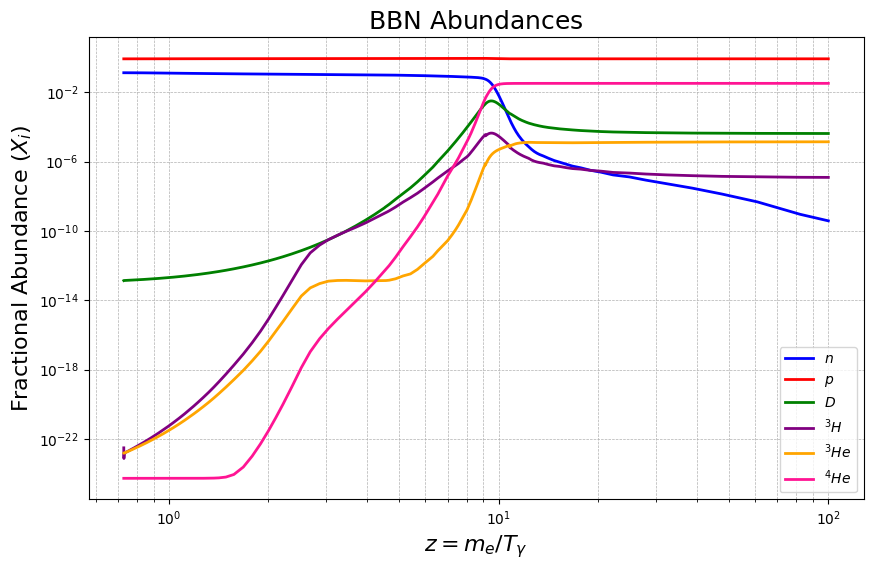

PyObject <matplotlib.legend.Legend object at 0x7e33a70e9ba0>

In [ ]:
#=
plot(z_val, xn_val, linewidth=2, label=L"$n$")
plot(z_val, xp_val, linewidth=2, label=L"$p$")
plot(z_val, xd_val, linewidth=2, label=L"$D$")
plot(z_val, x3h_val, linewidth=2, label=L"$^{3}H$")
plot(z_val, x3he_val, linewidth=2, label=L"$^{3}He$")
plot(z_val, x4he_val, linewidth=2, label=L"$^{4}He$")

yscale("log")
xscale("log")
xlabel(L"$z=\frac{m_e}{T_{\gamma(MeV)}}$", fontsize=14)
legend()
=#
using PyPlot



# Create the figure and axis
fig, ax = subplots(figsize=(10, 6))

# Plot the data with customizations
ax.plot(
    z_val, xn_val, linewidth=2, label=L"$n$", color="blue"
)
ax.plot(
    z_val, xp_val, linewidth=2, label=L"$p$", color="red"
)
ax.plot(
    z_val, xd_val, linewidth=2, label=L"$D$", color="green"
)
ax.plot(
    z_val, x3h_val, linewidth=2, label=L"$^{3}H$", color="purple"
)
ax.plot(
    z_val, x3he_val, linewidth=2, label=L"$^{3}He$", color="orange"
)
ax.plot(
    z_val, x4he_val, linewidth=2, label=L"$^{4}He$", color="deeppink"
)

# Set scale to logarithmic
ax.set_yscale("log")
ax.set_xscale("log")

# Labeling and legend
ax.set_xlabel(L"z=m_e/T_{\gamma}}", size=16)
ax.set_ylabel(L"\mathrm{Fractional\ Abundance\ }(X_{i})", size=16)
ax.set_title(L"\mathrm{BBN\ Abundances}", size=18)

# Add a grid
ax.grid("True", which="both", linestyle="--", linewidth=0.5)
ax.legend()



In [ ]:
function pn_gammaD_andlo(z)
    T = m_e / z
    T_9 = mev_to_t9kelvin(T)
    # nb = 6.14e-10 * 410.73 * (T / 2.7255) ^ 3
    NA = 6.022e23
    if T_9 <= 1.5
        f = (44216. * (1 + 3.75191 * T_9 + 1.92934 * T_9^2 + 0.746503 * T_9^3 + 0.0197023 * T_9^4 + 3.00491e-6 * T_9^5) / (1 + 5.4678 * T_9 + 5.62395 * T_9^2 + 0.489312 * T_9^3 + 0.00747806 * T_9^4))
    else
        f = (1. - sqrt(T_9) * 0.8504 + T_9 * 0.4895 - T_9^(3/2) * 0.09623 + T_9 * 0.008471 * T_9 - T_9 * 2.8e-4 * T_9^(3/2)) * 47420
    end
    rate = f
    return n_b(z) * rate / NA
end


function DD_n3He_alcoc(z)
    T9 = mev_to_t9kelvin(m_e / z)
    if T9 < 0.001
        rate = 1.142e-8
    elseif 0.001 <= T9 <= 0.0015
        rate = 1.142e-8
    elseif 0.0015 < T9 <= 0.0025
        rate = 5.470e-5
    elseif 0.0025 < T9 <= 0.0035
        rate = 3.021e-3
    elseif 0.0035 < T9 <= 0.0045
        rate = 3.732e-2
    elseif 0.0045 < T9 <= 0.0055
        rate = 2.212e-1
    elseif 0.0055 < T9 <= 0.0065
        rate = 8.546e-1
    elseif 0.0065 < T9 <= 0.0075
        rate = 2.505
    elseif 0.0075 < T9 <= 0.0085
        rate = 6.066
    elseif 0.0085 < T9 <= 0.0095
        rate = 1.278e1
    elseif 0.0095 < T9 <= 0.0105
        rate = 2.424e1
    elseif 0.0105 < T9 <= 0.0115
        rate = 4.237e1
    elseif 0.0115 < T9 <= 0.0125
        rate = 6.936e1
    elseif 0.0125 < T9 <= 0.0135
        rate = 1.077e2
    elseif 0.0135 < T9 <= 0.0145
        rate = 1.600e2
    elseif 0.0145 < T9 <= 0.0155
        rate = 2.291e2
    elseif 0.0155 < T9 <= 0.0170
        rate = 3.179e2
    elseif 0.0170 < T9 <= 0.0190
        rate = 5.667e2
    elseif 0.0190 < T9 <= 0.0225
        rate = 9.310e2
    elseif 0.0225 < T9 <= 0.0275
        rate = 2.504e3
    elseif 0.0275 < T9 <= 0.0350
        rate = 5.301e3
    elseif 0.0350 < T9 <= 0.0450
        rate = 1.568e4
    elseif 0.0450 < T9 <= 0.0550
        rate = 3.369e4
    elseif 0.0550 < T9 <= 0.0650
        rate = 6.013e4
    elseif 0.0650 < T9 <= 0.0750
        rate = 9.527e4
    elseif 0.0750 < T9 <= 0.0850
        rate = 1.390e5
    elseif 0.0850 < T9 <= 0.0950
        rate = 1.912e5
    elseif 0.0950 < T9 <= 0.1050
        rate = 2.513e5
    elseif 0.1050 < T9 <= 0.1150
        rate = 3.190e5
    elseif 0.1150 < T9 <= 0.1250
        rate = 3.938e5
    elseif 0.1250 < T9 <= 0.1350
        rate = 4.753e5
    elseif 0.1350 < T9 <= 0.1450
        rate = 5.631e5
    elseif 0.1450 < T9 <= 0.1550
        rate = 6.568e5
    elseif 0.1550 < T9 <= 0.1700
        rate = 7.559e5
    elseif 0.1700 < T9 <= 0.1900
        rate = 9.691e5
    elseif 0.1900 < T9 <= 0.2250
        rate = 1.200e6
    elseif 0.2250 < T9 <= 0.2750
        rate = 1.842e6
    elseif 0.2750 < T9 <= 0.3250
        rate = 2.555e6
    elseif 0.3250 < T9 <= 0.3750
        rate = 3.318e6
    elseif 0.3750 < T9 <= 0.4250
        rate = 4.119e6
    elseif 0.4250 < T9 <= 0.4750
        rate = 4.946e6
    elseif 0.4750 < T9 <= 0.5500
        rate = 5.792e6
    elseif 0.5500 < T9 <= 0.6500
        rate = 7.517e6
    elseif 0.6500 < T9 <= 0.7500
        rate = 9.260e6
    elseif 0.7500 < T9 <= 0.8500
        rate = 1.100e7
    elseif 0.8500 < T9 <= 0.9500
        rate = 1.272e7
    elseif 0.9500 < T9 <= 1.1250
        rate = 1.442e7
    elseif 1.1250 < T9 <= 1.3750
        rate = 1.850e7
    elseif 1.3750 < T9 <= 1.6250
        rate = 2.235e7
    elseif 1.6250 < T9 <= 1.8750
        rate = 2.595e7
    elseif 1.8750 < T9 <= 2.2500
        rate = 2.932e7
    elseif 2.2500 < T9 <= 2.7500
        rate = 3.546e7
    elseif 2.7500 < T9 <= 3.2500
        rate = 4.093e7
    elseif 3.2500 < T9 <= 3.7500
        rate = 4.585e7
    elseif 3.7500 < T9 <= 4.5000
        rate = 5.031e7
    elseif 4.5000 < T9 <= 5.5000
        rate = 5.816e7
    elseif 5.5000 < T9 <= 6.5000
        rate = 6.488e7
    elseif 6.5000 < T9 <= 7.5000
        rate = 7.072e7
    elseif 7.5000 < T9 <= 8.5000
        rate = 7.583e7
    elseif 8.5000 < T9 <= 9.5000
        rate = 8.037e7
    elseif 9.5000 < T9 <= 10.0000
        rate = 8.437e7
    else
        rate = 0.0
    end
    rate = rate
    return n_b(z) * rate / NA
end


function DD_p3H_alcoc(z)
    T = m_e / z
    T9 = mev_to_t9kelvin(T)
    NA = 6.022e23
    if T9 < 0.001
        rate = 1.173e-8
    elseif 0.001 <= T9 <= 0.0015
        rate = 1.173e-8
    elseif 0.0015 < T9 <= 0.0025
        rate = 5.609e-5
    elseif 0.0025 < T9 <= 0.0035
        rate = 3.092e-3
    elseif 0.0035 < T9 <= 0.0045
        rate = 3.814e-2
    elseif 0.0045 < T9 <= 0.0055
        rate = 2.257e-1
    elseif 0.0055 < T9 <= 0.0065
        rate = 8.707e-1
    elseif 0.0065 < T9 <= 0.0075
        rate = 2.549
    elseif 0.0075 < T9 <= 0.0085
        rate = 6.164
    elseif 0.0085 < T9 <= 0.0095
        rate = 1.297e1
    elseif 0.0095 < T9 <= 0.0105
        rate = 2.458e1
    elseif 0.0105 < T9 <= 0.0115
        rate = 4.290e1
    elseif 0.0115 < T9 <= 0.0125
        rate = 7.016e1
    elseif 0.0125 < T9 <= 0.0135
        rate = 1.088e2
    elseif 0.0135 < T9 <= 0.0145
        rate = 1.615e2
    elseif 0.0145 < T9 <= 0.0155
        rate = 2.310e2
    elseif 0.0155 < T9 <= 0.0170
        rate = 3.202e2
    elseif 0.0170 < T9 <= 0.0190
        rate = 5.698e2
    elseif 0.0190 < T9 <= 0.0225
        rate = 9.343e2
    elseif 0.0225 < T9 <= 0.0275
        rate = 2.502e3
    elseif 0.0275 < T9 <= 0.0350
        rate = 5.276e3
    elseif 0.0350 < T9 <= 0.0450
        rate = 1.549e4
    elseif 0.0450 < T9 <= 0.0550
        rate = 3.307e4
    elseif 0.0550 < T9 <= 0.0650
        rate = 5.868e4
    elseif 0.0650 < T9 <= 0.0750
        rate = 9.246e4
    elseif 0.0750 < T9 <= 0.0850
        rate = 1.343e5
    elseif 0.0850 < T9 <= 0.0950
        rate = 1.837e5
    elseif 0.0950 < T9 <= 0.1050
        rate = 2.404e5
    elseif 0.1050 < T9 <= 0.1150
        rate = 3.039e5
    elseif 0.1150 < T9 <= 0.1250
        rate = 3.737e5
    elseif 0.1250 < T9 <= 0.1350
        rate = 4.493e5
    elseif 0.1350 < T9 <= 0.1450
        rate = 5.304e5
    elseif 0.1450 < T9 <= 0.1550
        rate = 6.165e5
    elseif 0.1550 < T9 <= 0.1700
        rate = 7.072e5
    elseif 0.1700 < T9 <= 0.1900
        rate = 9.011e5
    elseif 0.1900 < T9 <= 0.2250
        rate = 1.110e6
    elseif 0.2250 < T9 <= 0.2750
        rate = 1.682e6
    elseif 0.2750 < T9 <= 0.3250
        rate = 2.309e6
    elseif 0.3250 < T9 <= 0.3750
        rate = 2.974e6
    elseif 0.3750 < T9 <= 0.4250
        rate = 3.663e6
    elseif 0.4250 < T9 <= 0.4750
        rate = 4.371e6
    elseif 0.4750 < T9 <= 0.5500
        rate = 5.089e6
    elseif 0.5500 < T9 <= 0.6500
        rate = 6.543e6
    elseif 0.6500 < T9 <= 0.7500
        rate = 8.001e6
    elseif 0.7500 < T9 <= 0.8500
        rate = 9.448e6
    elseif 0.8500 < T9 <= 0.9500
        rate = 1.087e7
    elseif 0.9500 < T9 <= 1.1250
        rate = 1.228e7
    elseif 1.1250 < T9 <= 1.3750
        rate = 1.565e7
    elseif 1.3750 < T9 <= 1.6250
        rate = 2.882e7
    elseif 1.6250 < T9 <= 1.8750
        rate = 2.181e7
    elseif 1.8750 < T9 <= 2.2500
        rate = 2.461e7
    elseif 2.2500 < T9 <= 2.7500
        rate = 2.976e7
    elseif 2.7500 < T9 <= 3.2500
        rate = 3.440e7
    elseif 3.2500 < T9 <= 3.7500
        rate = 3.863e7
    elseif 3.7500 < T9 <= 4.5000
        rate = 4.251e7
    elseif 4.5000 < T9 <= 5.5000
        rate = 4.946e7
    elseif 5.5000 < T9 <= 6.5000
        rate = 5.552e7
    elseif 6.5000 < T9 <= 7.5000
        rate = 6.077e7
    elseif 7.5000 < T9 <= 8.5000
        rate = 6.529e7
    elseif 8.5000 < T9 <= 9.5000
        rate = 6.912e7
    elseif 9.5000 < T9 <= 10.0000
        rate = 7.228e7
    else
        rate = 0.0
    end
    rate = n_b(z) * rate / NA
    return rate
end



DD_p3H_alcoc (generic function with 1 method)

In [ ]:
"""
function DD_n3He_alcoc(z)
    T = m_e / z
    T_9 = mev_to_t9kelvin(T)
    NA = 6.022e23
    rate = (T_9^(-2/3)) * exp(-T_9^(-1/3)) * (
        -1.84664e6 + 1.22986e7 * T_9^(1/3) - 1.3761e7 * T_9^(2/3) - 6.11628e7 * T_9
        + 1.3329e8 * T_9^(4/3) - 1.24333e7 * T_9^(5/3) - 2.72404e7 * T_9^2
        + 8.52947e6 * T_9^(7/3) + 2.2519e6 * T_9^(8/3) - 2.31204e6 * T_9^3
        - 294342 * T_9^(10/3) + 911550 * T_9^(11/3) - 252211 * T_9^4
    )

    return (n_b(z) * rate / NA)
end


function DD_p3H_alcoc(z)
    T = m_e / z
    T_9 = mev_to_t9kelvin(T)
    rhob = 2.12e-4 * T_9^3
    t9 = mev_to_t9kelvin(m_e / z)
    NA = 6.022e23
    t913 = t9^(1/3)
    t923 = t9^(2/3)
    t943 = t9^(4/3)
    t953 = t9^(5/3)

    rate = 3.91889e8 * t9^(-2/3) * exp(-4.2586 / t913) * (
        1 + 0.309233 * t913 - 0.337260 * t923 +
        2.51922 * t9 - 2.79097 * t943 + 2.16082 * t953 -
        0.976181 * t9^2 + 0.210883 * t943 * t9 -
        0.0169027 * t953 * t9 + 7.845538e-6 * t9^3
    )

    return (n_b(z) * rate / NA)
end
"""

"function DD_n3He_alcoc(z)\n    T = m_e / z\n    T_9 = mev_to_t9kelvin(T)\n    NA = 6.022e23\n    rate = (T_9^(-2/3)) * exp(-T_9^(-1/3)) * (\n        -1.84664e6 + 1.22986e7 * T_9^(1/3) - 1.3761e7 * T_9^(2/3) - 6.11628e7 * T_9\n        + 1.3329e8 * T_9^(4/3) - 1.24333e7 * T_9^(5" ⋯ 480 bytes ⋯ "p(-4.2586 / t913) * (\n        1 + 0.309233 * t913 - 0.337260 * t923 +\n        2.51922 * t9 - 2.79097 * t943 + 2.16082 * t953 -\n        0.976181 * t9^2 + 0.210883 * t943 * t9 -\n        0.0169027 * t953 * t9 + 7.845538e-6 * t9^3\n    )\n\n    return (n_b(z) * rate / NA)\nend\n"

In [ ]:
function gammaD_pn(z)
    term1 = (Xp_in(z) * Xn_in(z)) / Xi(z, 3, 2, 0.511, 938.27, 940.6, 1875.62, 6.13832e-10,6.86, 1)
    reverse_rate = term1 * pn_gammaD_andlo(z)
    return reverse_rate
end


gammaD_pn (generic function with 1 method)

In [ ]:

function threegamma_1two(sigma_v_ab, T_9, A1, A2, A3, ga, gb, gc, Q)
    c_gamma = 9.8686 * 10^9 * T_9^(3/2) * (A1 * A2 / A3) * (ga * gb / gc) * exp(-11.605 * Q / T_9)
    ngamma_sigma_v_cgamma = sigma_v_ab * c_gamma
    return ngamma_sigma_v_cgamma
end


threegamma_1two (generic function with 2 methods)

In [ ]:
"""
function gammaD_pn(z)
    value1 = pn_gammaD(z)
    T_9 = mev_to_t9kelvin(z)
    A1 = 1.00727
    A2 = 1.00866
    A3 = 2.01410
    ga = 2
    gb = 2
    gc = 3
    Q = 1.7135810198702273
    value1 = value1
    rate1r = threegamma_1two(value1, T_9, A1, A2, A3, ga, gb, gc, Q)
    return rate1r
end
"""

"function gammaD_pn(z)\n    value1 = pn_gammaD(z)\n    T_9 = mev_to_t9kelvin(z)\n    A1 = 1.00727\n    A2 = 1.00866\n    A3 = 2.01410\n    ga = 2\n    gb = 2\n    gc = 3\n    Q = 1.7135810198702273\n    value1 = value1\n    rate1r = threegamma_1two(value1, T_9, A1, A2, A3, ga, gb, gc, Q)\n    return rate1r\nend\n"

In [ ]:
function xp_dot(z, xn, xp, xd)
    value = (lambda_np(z) * xn - lambda_pn(z) * xp + (gammaD_pn(z) * xd - pn_gammaD_andlo(z) * xp * xn)
              + ((DD_p3H_alcoc(z) * xd ^ 2) / 2 )) * dt_dz(z)
    return value
end

function xn_dot(z, xn, xp, xd)
    value = (lambda_pn(z) * xp - lambda_np(z) * xn + (gammaD_pn(z) * xd - pn_gammaD_andlo(z) * xp * xn)
             + ((DD_n3He_alcoc(z) * xd ^ 2) / 2 )) * dt_dz(z)
    return value
end

function xd_dot(z, xn, xp, xd)
    value = ((pn_gammaD_andlo(z) * xp * xn - gammaD_pn(z) * xd) - 2 * (((DD_p3H_alcoc(z) * xd ^ 2) / 2 ) + ((DD_n3He_alcoc(z) * xd ^ 2) / 2))) * dt_dz(z)
    return value
end

function x4he_dot(z, xd)
    value = ((((DD_p3H_alcoc(z) * xd ^ 2) / 2 ) + ((DD_n3He_alcoc(z) * xd ^ 2) / 2))) * dt_dz(z)
    return value
end

x4he_dot (generic function with 1 method)

In [ ]:

function small_network(u, p, z)
    xn, xp, xd, x4he = u
    dx_n = xn_dot(z,u[1],u[2],u[3])  # Define the equation for dx/dt here based on x, y, and t
    dx_p = xp_dot(z,u[1],u[2],u[3])
    dx_d = xd_dot(z,u[1],u[2],u[3])
    dx_4he=x4he_dot(z,u[3])
    [dx_n,dx_p,dx_d,dx_4he] # Define the equation for dy/dt here based on x, y, and t
end



small_network (generic function with 1 method)

In [ ]:

x1_0=Xn_in(minimum(z_evolve))
x2_0=Xp_in(minimum(z_evolve))
x3_0=Xi(minimum(z_evolve), 3, 2, 0.511, 938.27, 940.6, 1875.62, 6.13832e-10, 6.86, 1)
x4_h0=Xi(minimum(z_evolve), 1, 4, 0.511, 938.27, 940.6, 3728.42, 6.13832e-10, 53.32, 2)


1.366585706572369e-24

In [ ]:
xd0 = Xi(minimum(z_evolve), 3, 2, 0.511, 938.27, 940.6, 1875.62, 6.13832e-10, 6.86, 1)
x3h0 = Xi(minimum(z_evolve), 2, 3, 0.511, 938.27, 940.6, 2809.45, 6.13832e-10, 16.63, 1)
x3he0 = Xi(minimum(z_evolve), 2, 3, 0.511, 938.27, 940.6, 2809.431, 6.13832e-10, 13.11, 2)
x4he0 = Xi(minimum(z_evolve), 1, 4, 0.511, 938.27, 940.6, 3728.42, 6.13832e-10, 53.32, 2)

1.366585706572369e-24

In [ ]:
x4_h0

1.366585706572369e-24

In [ ]:
z_iterate = []
for i in znu
    if mev_to_t9kelvin(m_e / i) < 10
        push!(z_iterate, i)
    end
end


In [ ]:
Pkg.add("DifferentialEquations")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [ ]:
using Pkg
Pkg.add("Sundials")
using Sundials

   Resolving package versions...
    Updating `~/.julia/environments/v1.9/Project.toml`
  [c3572dad] + Sundials v4.19.3
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [ ]:
Pkg.add("LSODA")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [ ]:

using DifferentialEquations, BenchmarkTools
u20=[x1_0,x2_0,x3_0,x4_h0]
tspan = (0.45,100)
prob2 = ODEProblem(small_network, u20, tspan)
@btime solve(prob2,KenCarp4(),reltol=1e-6,abstol=1e-9);


  78.635 ms (1846181 allocations: 32.49 MiB)


In [ ]:
sol2=solve(prob2,KenCarp4(),reltol=1e-6,abstol=1e-9)

retcode: Success
Interpolation: 3rd order Hermite
t: 105-element Vector{Float64}:
   0.45
   0.4500000537612786
   0.45000059137406434
   0.4500059675019219
   0.4500597287804974
   0.4505973415662522
   0.4559734694238006
   0.4719455921701409
   0.49168565965986866
   0.5191469323758211
   0.5527970866143065
   0.5960315275419502
   0.6487201076246312
   ⋮
  16.848680233582957
  19.197235349377372
  22.222935702358374
  24.43212171440767
  30.05612076377139
  35.68011981313511
  41.304118862498825
  48.54749842321882
  56.83695478767612
  66.38865157088428
  84.7775578890916
 100.0
u: 105-element Vector{Vector{Float64}}:
 [0.1303916867583087, 0.8696083132416913, 1.8932679982394593e-12, 1.366585706572369e-24]
 [0.13039174219678726, 0.8696082578059589, 5.20243648744322e-13, 1.366585706572369e-24]
 [0.13039229656426918, 0.8696077034384769, 5.202472664440371e-13, 1.366585706572369e-24]
 [0.1303978398817699, 0.8696021601209762, 5.202759314997875e-13, 1.366585706572369e-24]
 [0.13045323734

In [ ]:
z_values2 = sol2.t
xn_values2 = sol2[1, :]
xp_values2= sol2[2, :]
xd_values2= sol2[3, :]
x4he_values2=sol2[4, :]

105-element Vector{Float64}:
 1.366585706572369e-24
 1.366585706572369e-24
 1.366585706572369e-24
 1.366585706572369e-24
 1.366585706572369e-24
 1.366585706572369e-24
 1.366585706572369e-24
 1.366585706572369e-24
 1.366585706572369e-24
 1.366585706572369e-24
 1.366585706572369e-24
 8.328303406344598e-20
 5.412256172806916e-19
 ⋮
 0.0810503944347086
 0.0810505063117224
 0.08105060296196667
 0.08105064207761063
 0.081050699523482
 0.08105072558211829
 0.08105073877231797
 0.08105074824210323
 0.08105075337944916
 0.08105075616856575
 0.08105075871430706
 0.08105075939827834

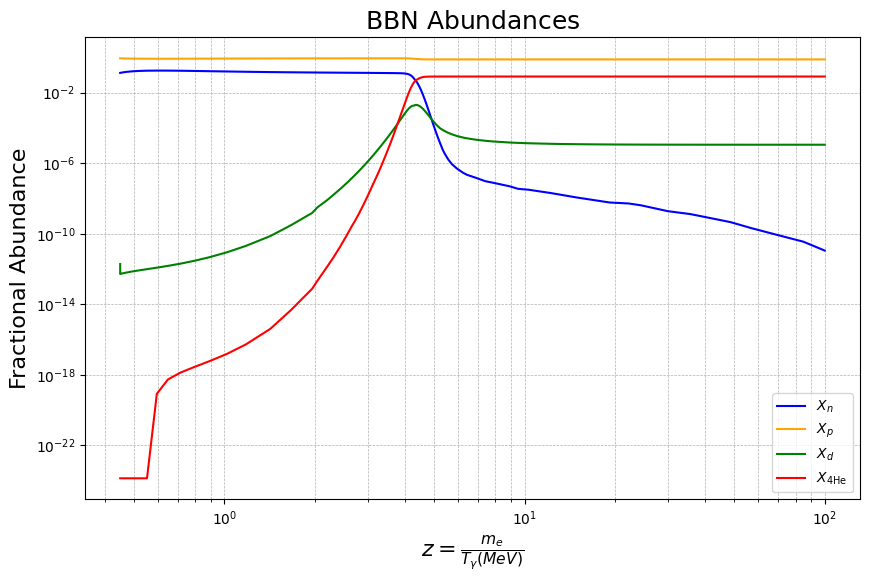

In [ ]:
# Assuming you have already defined your data arrays z_values2, xn_values2, xp_values2, xd_values2, x4he_values2
using PyPlot

# Assuming you have already defined your data arrays z_values2, xn_values2, xp_values2, xd_values2, x4he_values2

# Increase the figure size
fig, ax = subplots(figsize=(10, 6))  # Adjust the size as needed

# Plot the data with labels and custom colors
ax.plot(z_values2, xn_values2, label=L"X_n", color="blue")
ax.plot(z_values2, xp_values2, label=L"X_p", color="orange")
ax.plot(z_values2, xd_values2, label=L"X_d", color="green")
ax.plot(z_values2, x4he_values2, label=L"X_{4\mathrm{He}}", color="red")

# Set x and y scales to logarithmic
ax.set_xscale("log")
ax.set_yscale("log")

# Add labels and title with LaTeX formatting
ax.set_xlabel(L"z=\frac{m_e}{T_{\gamma}(MeV)}", size=16)
ax.set_ylabel("Fractional Abundance", size=16)
ax.set_title(L"\mathrm{BBN\ Abundances}", size=18)

# Add a grid
ax.grid("True", which="both", linestyle="--", linewidth=0.5)

# Add a legend
ax.legend()

# Display the plot
show()




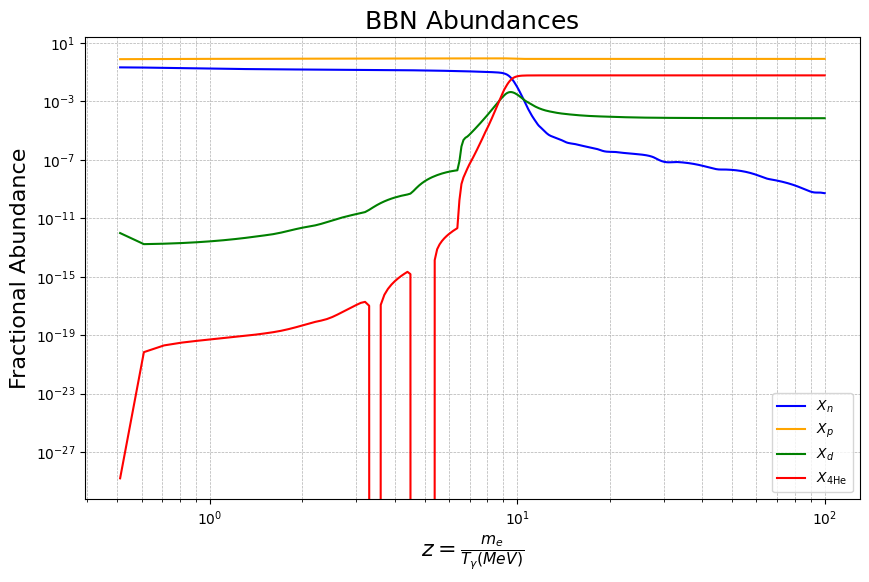